# Chapter2. Perceptron

- Frank Rosenblatt가 1957년에 고안
- 신경망(Deep learning)의 기원이 되는 Algorithm

### 2.1 Definition of Perceptron

- 다수의 신호를 입력으로 받아 하나의 신호를 출력
    
    + '신호': 전류나 강물처럼 <span style='color:#2D3748;background-color: #fff5b1;font-weight:700'>흐름</span>이 있는 것
<br>
<br>
- Perceptron 신호가 흐름 = 1, 신호가 흐르지 않음 = 0

![입력이 2개인 Perceptron](./dataset/ch02_01_Perceptron.jpeg)

- ${x_1, x_2}$: 입력 신호
- ${y}$: 출력 신호
- ${w_1, w_2}$: 가중치(weight)

- 뉴런에서 보내온 신호의 총합이 정해진 한계(${\theta}$,Threshold, 임계값)을 넘어설 때만 1을 출력

$${y =\begin{cases}0 \ (w_1x_1 \ + \ w_2x_2 \ \leq \ \theta) \\ 1 \ (w_1x_1 \ + \ w_2x_2 \ > \ \theta )\end{cases}}$$

### 2.2 단순한 논리 회로

> #### AND 게이트
- AND 게이트 진리표대로 작동하는 ${(w_1,\ w_2,\ \theta)}$ 값 예: (0.5, 9.5, 0.7) 
> #### NAND 게이트 & OR 게이트
- NAND = Not AND = AND 게이트 출력을 뒤집은 값 = AND 게이트 가중치와 $\theta$ 값의 **부호 반전**으로 적용 가능

### 2.3 퍼센트론 구현하기

> #### 간단한 구현
```python
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1
```

- 매개 변수 

In [18]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

for i in range(0,2):
    for j in range(0,2):
        print("AND(", i,",",j,"): ", AND(i, j))

AND( 0 , 0 ):  0
AND( 0 , 1 ):  0
AND( 1 , 0 ):  0
AND( 1 , 1 ):  1


#### 2.3.2 가중치와 편향 도입

- ${\theta}$를 -b로 치환
$${y =\begin{cases} \ 0 \ \ (b \ + \ w_1x_1 \ + \ w_2x_2 \ \leq \ \theta) \\ \ 1 \ \ (b \ + \ w_1x_1 \ + \ w_2x_2 \ > \ \theta )\end{cases}}$$

```python
import numpy as np

def AND(x1, x2):
    x = np.array([x1, x2])        # 입력
    w = np.array([0.5, 0.5])    # 가중치
    b = -0.7                    # 편향
    tmp = np.sum(w*x) + b
    if tmp <=0:
        return 0
    else:
        return 1

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])  # AND와 NAND는 가중치만 다르다
    b = 0.7
    tmp = np.sum(x*w) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([.5, .5])      # AND와 OR은 가중치만 다르다
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
```


In [14]:
import numpy as np

def AND(x1, x2):
    x = np.array([x1, x2])        # 입력
    w = np.array([0.5, 0.5])    # 가중치
    b = -0.7                    # 편향
    tmp = np.sum(w*x) + b
    if tmp <=0:
        return  0
    else:
        return  1

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])  # AND와 NAND는 가중치만 다르다
    b = 0.7
    tmp = np.sum(x*w) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([.5, .5])      # AND와 OR은 가중치만 다르다
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

for i in range(0,2):
    for j in range(0,2):
        print("AND(", i,",",j,"): ", AND(i, j))
        print("NAND(", i,",",j,"): ", NAND(i, j))
        print("OR(", i,",",j,"): ", OR(i, j))

AND( 0 , 0 ):  0
NAND( 0 , 0 ):  1
OR( 0 , 0 ):  0
AND( 0 , 1 ):  0
NAND( 0 , 1 ):  1
OR( 0 , 1 ):  1
AND( 1 , 0 ):  0
NAND( 1 , 0 ):  1
OR( 1 , 0 ):  1
AND( 1 , 1 ):  1
NAND( 1 , 1 ):  0
OR( 1 , 1 ):  1


### 2.4 퍼셉트론의 한계
- 퍼셉트론을 이용하면 `AND`, `NAND`, `OR`의 3가지 논리 회로를 구현할 수 있다.
- 그런데 `XOR`은?!!

#### 2.4.1 도전! XOR 게이트
- XOR 게이트는 배타적 논리합이라 불리는 논리 회로
- $x_1$과 $x_2$중 한쪽이 1일 때만 1을 출력 (=`배타적`, 나만 되! 넌 안되!)

<center>

|$x_1$|$x_2$|**$y$**|
|:---:|:---:|:---:|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|0|

</center>

- ``단층 퍼셉트론으로는 XOR 게이트를 구현할 수 없음`` = ``단층 퍼셉트론으로는 비선형 영역을 분리할 수 없음``
- 아래의 그래프 상에서 `원`과 `삼각형`을 직선 하나로 나누는 것은 불가능

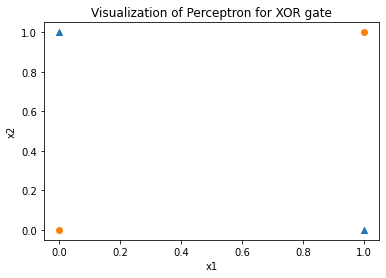

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x1 = [0, 1]
x2_1 = [1, 0]
x2_0 = [0, 1]

plt.scatter(x1, x2_1, marker="^")
plt.scatter(x1, x2_0, marker="o")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Visualization of Perceptron for XOR gate")
plt.show()

#### 2.4.2 선형과 비선형
- 곡선으로 나눈다면 XOR게이트의 출력(`원`과 `삼각형`)을 나눌 수 있음
- 곡선으로 나눠진 영역을 `비선형` 영역 (직선으로 나눠진 영역을 `선형` 영역)

### 2.5 다층 퍼쎕트론이 출동한다면?!
- 퍼셉트론으로는 XOR 게이트를 표현할 수 없었음
- 층을 쌓아 <b><u>`다층 퍼셉트론`</u></b>을 만들면 모든 것이 아름다워짐

#### 2.5.1 기존 게이트를 조합하기
- `NAND`의 출력을 $s_1$ `OR`의 출력을 $s_2$이라 하고 이를 `AND`로 처리한 값을 $y$라 하면 아래와 같은 진리표가 완성됨

<center>

|$x_1$|$x_2$|$s_1$|$s_1$|$y$|
|:--:|:--:|:--:|:--:|:--:|
|0|0|1|0|0|
|1|0|1|1|1|
|0|1|1|1|1|
|1|1|0|1|0|

</center>

#### 2.5.2 XOR 게이트 구현하기
- step#1. 0층의 두 뉴런이 입력 신호를 받아 1층의 뉴런으로 신호를 보냄
- step#2. 1층의 뉴런이 2층의 뉴런으로 신호를 보내고, 2층의 뉴런은 이 입력 신호를 바탕으로 y를 출력

In [15]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [16]:
for i in range(0, 2):
    for j in range(0, 2):
        print(XOR(int(i), int(j)))

0
1
1
0


### 2.6 NAND에서 컴퓨터까지
- 다층 퍼셉트론은 컴퓨터도 만들 정도로 복잡한 표현을 할 수 있음. (이론상으론 2층 퍼쎕트론(0층, 1층, 2층)이면 컴퓨터를 만들 수 있음)
- AND와 OR 게이트 $rightarrow$ 반가산기, 전가산기 $rightarrow$ 산술논리장치(Arithmetic and Logical Unit; ALU) $rightarrow$ 중앙처리장치(Central Process Unit; CPU)

### 2.7 정리
- 퍼셉트론은 입출력을 갖춘 알고리즘 = 입력을 주면, 정해진 규칙에 따른 값을 출력
- 퍼셉트론의 매개변수: `가중치`, `편향`
- 퍼셉트론으로 `AND`, `OR` 게이트 등의 논리 회로를 표현할 수 있음
- XOR 게이트는 단층 퍼셉트론으로 구현할 수 없음 $rightarrow$ `2층(이상의) 퍼셉트론`을 이용하면 XOR 게이트 표현 가능
- 단층 퍼셉트론은 직선형 영역만 표현, 다층 퍼셉트론은 <u>비선형 영역도</u> 표현 가능
- 다층 퍼셉트론은 이론상 컴퓨터도 표현할 수 있음.